## Import Libraries

In [108]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model & evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report

# utils
from collections import Counter

## Load Dataset

In [109]:
df = pd.read_csv('./bioresponse.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


## Simple EDA
- Checking data types
- Checking data scale
- Check null values
- Check imbalance dataset

### Check Data Types

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


Here we have 1776 predictor variables consist of 942 float and 835 int.

### Check Data Scale

In [111]:
df.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It seems that the data has scale 0-1, therefore we don't need to scale them using any scaler.

### Check Null Values

In [112]:
df.isna().sum().sum()

0

And there are no null values, so no need to do imputation.

### Check Imbalance Dataset

<AxesSubplot:xlabel='Activity', ylabel='count'>

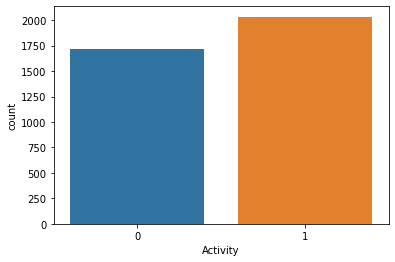

In [113]:
sns.countplot(data=df, x='Activity')

Label `1` is greater than `0` but it seems the difference is not so large. Let's try to construct some models.

## Data Preparation

In [114]:
# remove target from predictor
X = df.drop('Activity', axis=1)

# assign target variable
y = df['Activity']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling
Based on the given task, we need to create 4 classifiers:
- Small Decision Tree
- Deep Decision Tree
- Random Forest on Small Trees
- Random Forest on Deep Trees

In [126]:
def train_predict(model, X_train, X_test, y_train, y_test, threshold=None):
    # train model
    model.fit(X_train, y_train)

    # predict on test data
    y_pred = model.predict(X_test)

    # predict probability
    y_pred_proba = model.predict_proba(X_test)    

    # if threshold set, then use predict proba instead
    if threshold != None:
        # apply threshold to predict proba values
        y_pred = y_pred_proba[:, 1] > threshold

    # print evaluation result
    print(f'Precision: {precision_score(y_test, y_pred):.3f}')
    print(f'Recall: {recall_score(y_test, y_pred):.3f}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    print(f'F1-score: {f1_score(y_test, y_pred):.3f}')
    print(f'Log-Loss: {log_loss(y_test, y_pred):.3f}')    
    print(f'ROC-AUC: {roc_auc_score(y_test, y_pred):.3f}')

    # plot precision recall curve
    prec, rec, thres = precision_recall_curve(y_test, y_pred_proba[:, 1])
    plt.figure(figsize=(8,5))
    plt.grid()
    plt.plot(thres, prec[:-1], label='Precision')
    plt.plot(thres, rec[:-1], label='Recall')
    plt.xlabel('Threshold')
    plt.title('Precision Recall curve')    
    plt.legend()

    # plot ROC curve
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba[:, 1])
    plt.figure(figsize=(8,5))
    plt.grid()
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_pred):.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)    
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # classification report
    # print(classification_report(y_test, y_pred))

### Small Decision Tree

Precision: 0.789
Recall: 0.753
Accuracy: 0.742
F1-score: 0.771
Log-Loss: 8.922
ROC-AUC: 0.740


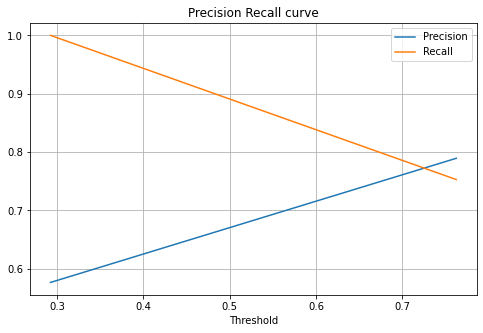

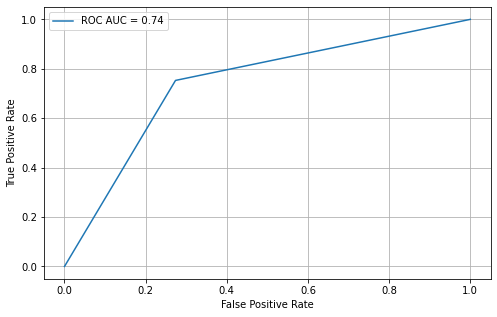

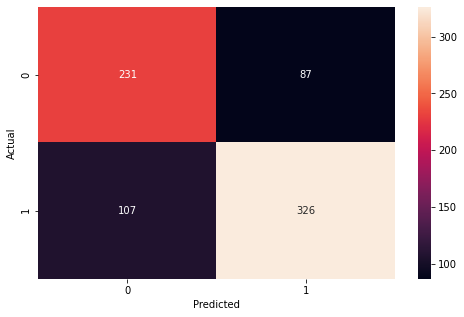

In [116]:
# model initialization
sDT = DecisionTreeClassifier(random_state=42, max_depth=1)

train_predict(sDT, X_train, X_test, y_train, y_test)

### Deep Decision Tree

Precision: 0.780
Recall: 0.769
Accuracy: 0.742
F1-score: 0.774
Log-Loss: 8.922
ROC-AUC: 0.737


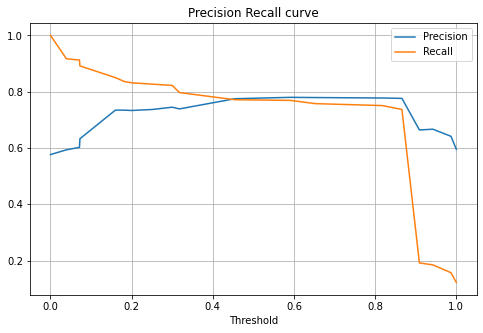

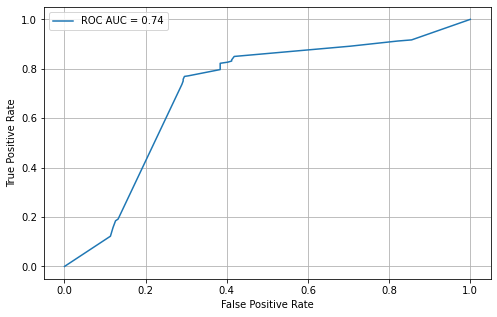

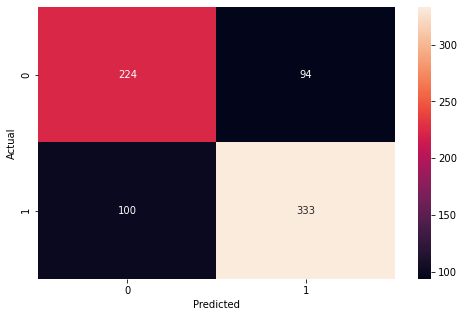

In [117]:
# model initialization
dDT = DecisionTreeClassifier(random_state=42, max_depth=10)

train_predict(dDT, X_train, X_test, y_train, y_test)

### Shallow Random Forest

Precision: 0.743
Recall: 0.783
Accuracy: 0.719
F1-score: 0.763
Log-Loss: 9.704
ROC-AUC: 0.707


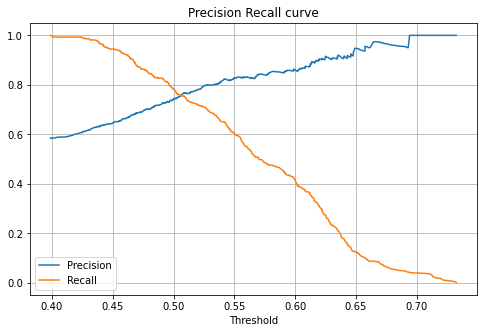

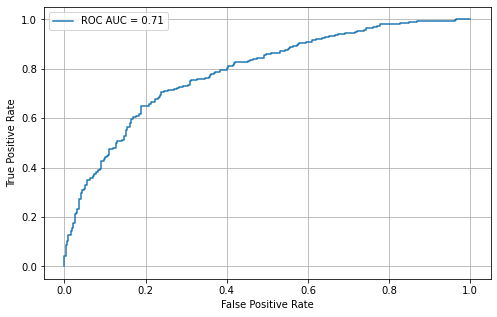

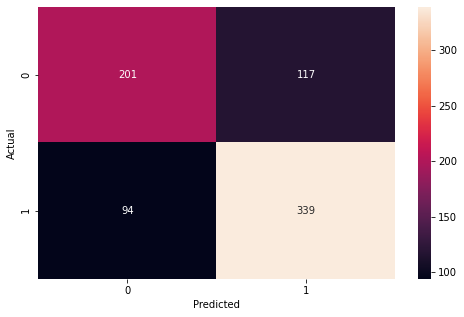

In [118]:
sRF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

train_predict(sRF, X_train, X_test, y_train, y_test)

### Deep Random Forest

Precision: 0.836
Recall: 0.822
Accuracy: 0.804
F1-score: 0.829
Log-Loss: 6.761
ROC-AUC: 0.801


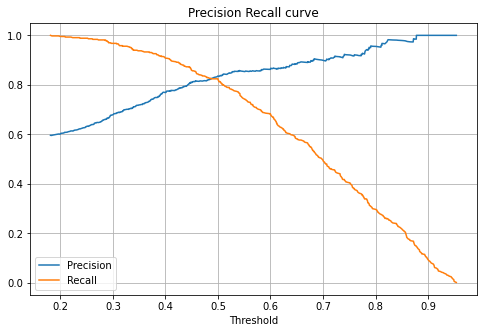

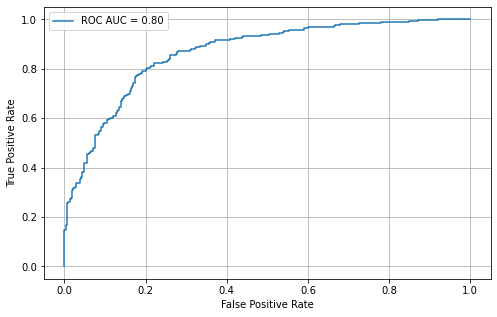

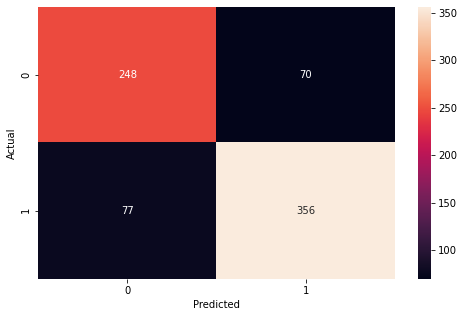

In [119]:
dRF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

train_predict(dRF, X_train, X_test, y_train, y_test)

## Avoids False Negatie Error
Specifically, `avoids` in this task mean that recall score of the model should be greater than 0.95.

Precision: 0.720
Recall: 0.938
Accuracy: 0.754
F1-score: 0.814
Log-Loss: 8.508
ROC-AUC: 0.720


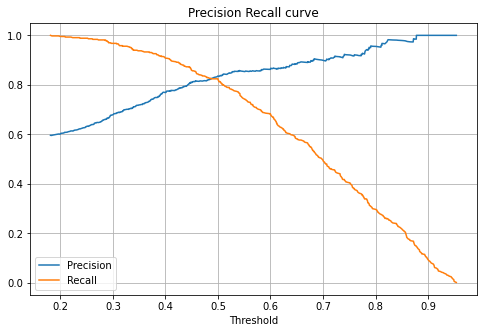

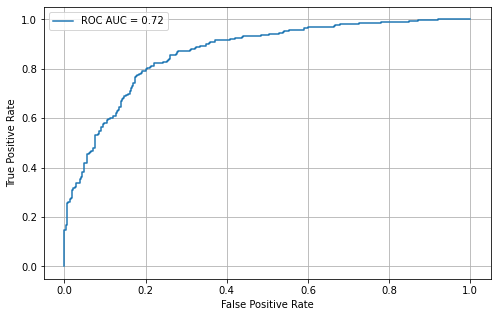

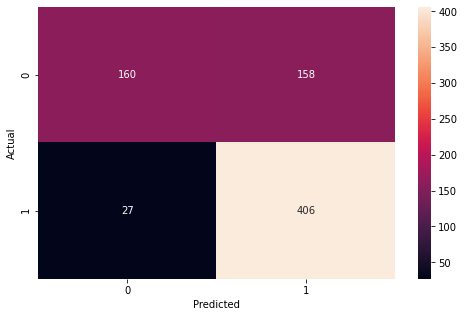

In [133]:
train_predict(dRF, X_train, X_test, y_train, y_test, threshold=0.35)